## Librerias

In [25]:
import pandas as pd 
from  pydynpd import regression
import numpy as np
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
from linearmodels.panel import compare
import statsmodels.api as sm
import seaborn as sns
#from linearmodels.panel import PanelData
from linearmodels import RandomEffects
from scipy import stats

## Data

In [6]:
data=pd.read_csv("Export_PE_CH.csv",sep=';')
# Crear un DataFrame de panel con MultiIndex

In [7]:
data.columns
a=['cmer','tcult','fbkf','terinter','tipca','pbi','fert']
for i in a:
    data[i]=data[i].str.replace(',','.').astype(np.float64) 

In [8]:
'''data.cmer=data.cmer.str.replace(',','.').astype(np.float64)
data.tcult=data.tclut.str.replace(',','.').astype(np.float64)
data.fbkf=data.fbkf.str.replace(',','.').astype(np.float64)'''

"data.cmer=data.cmer.str.replace(',','.').astype(np.float64)\ndata.tcult=data.tclut.str.replace(',','.').astype(np.float64)\ndata.fbkf=data.fbkf.str.replace(',','.').astype(np.float64)"

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   22 non-null     object 
 1   year      22 non-null     int64  
 2   cmer      22 non-null     float64
 3   tcult     22 non-null     float64
 4   fbkf      22 non-null     float64
 5   terinter  22 non-null     float64
 6   tipca     22 non-null     float64
 7   pbi       22 non-null     float64
 8   fert      22 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.7+ KB


### Conversion de data

In [10]:
country=data.set_index(['country','year'])

In [11]:
country

cmer  tcult   fbkf  terinter   tipca    pbi         fert
country year                                                          
Chile   2010  0.25   1.71  23.02    121.33  510.34  217.1  376000143.5
        2011  0.29   1.77  24.72    109.50  483.65  251.2  517211763.9
        2012  0.24   1.73  26.75     97.85  486.63  267.2  558395412.0
        2013  0.25   1.76  26.35     97.24  495.09  277.2  517055740.1
        2014  0.25   1.73  25.47    103.43  570.08  259.4  460957606.5
        2015  0.27   1.77  25.47    108.92  654.05  242.5  520534401.1
        2016  0.30   1.71  24.13    108.24  676.80  249.3  326656477.3
        2017  0.20   1.72  22.26    111.03  649.21  276.4  360231229.5
        2018  0.21   1.63  23.05    109.56  640.94  295.4  449090792.9
        2019  0.18   1.57  24.52     99.93  702.78  278.5  443533354.0
        2020  0.15   1.61  22.55    113.96  792.35  254.1  394184078.6
Peru    2010  0.03   3.79  23.51    119.49    2.83  147.5  379361352.1
        2011  0.03   3.82  23.35    122.42    2.75  171.8  557880664.4
        2012  0.16   3.85  25.04    109.97    2.63  192.6  585703396.0
        2013  0.00   3.65  25.30     98.26    2.72  201.2  522645070.7
        2014  0.01   3.45  24.54     91.63    2.85  200.8  499790439.1
        2015  0.03   3.26  23.09     87.35    3.20  189.8  529184711.1
        2016  0.06   2.97  21.45     99.75    3.38  191.9  369647378.3
        2017  0.10   2.94  20.61    111.25    3.25  211.0  538768164.3
        2018  0.13   2.98  20.92    109.45    3.29  222.6  456846838.8
        2019  0.19   2.80  20.97    106.54    3.34  228.3  499035710.1
        2020  0.23   2.80  19.89    107.47    3.51  201.9  496982263.3

## Prueba de tratamiento de datos

#### Correlacion de los datos

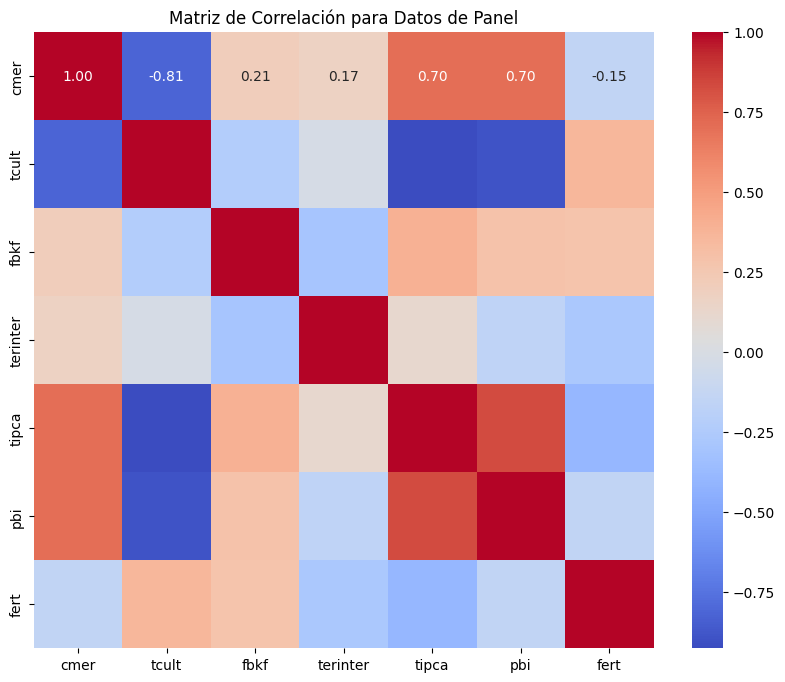

In [12]:
cor=country.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Datos de Panel')
plt.show()

## Modelado

### Modelo Pool

In [13]:
mod_pool=PanelOLS.from_formula('cmer ~ tcult + fbkf + terinter + tipca + pbi + fert',data=country).fit()

In [14]:
mod_pool.summary

Dep. Variable:,cmer,R-squared:,0.9422
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,22,R-squared (Within):,0.4613
Date:,"Sun, Oct 22 2023",R-squared (Overall):,0.9422
Time:,19:39:24,Log-likelihood,36.883
Cov. Estimator:,Unadjusted,,
,,F-statistic:,43.439
Entities:,2,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(6,16)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,43.439


## Modelo de Efectos Fijos

In [15]:
model_fe = PanelOLS.from_formula('cmer ~ tcult + fbkf + terinter + tipca + pbi + fert + EntityEffects', data=country)
model_fe = model_fe.fit(cov_type='kernel', kernel='bartlett')
model_fe.summary

Dep. Variable:,cmer,R-squared:,0.4713
Estimator:,PanelOLS,R-squared (Between):,-2.2845
No. Observations:,22,R-squared (Within):,0.4713
Date:,"Sun, Oct 22 2023",R-squared (Overall):,-1.9886
Time:,19:39:26,Log-likelihood,37.089
Cov. Estimator:,Driscoll-Kraay,,
,,F-statistic:,2.0798
Entities:,2,P-value,0.1215
Avg Obs:,11.000,Distribution:,"F(6,14)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,23.336


In [78]:
model_fe = sm.OLS(country['cmer'], sm.add_constant(country[['tcult', 'fbkf', 'terinter', 'tipca', 'pbi', 'fert']])).fit(cov_type='cluster', cov_kwds={'groups': country.index.get_level_values(0)})
print("Modelo de Efectos Fijos:")
print(model_fe.summary())

Modelo de Efectos Fijos:
                            OLS Regression Results                            
Dep. Variable:                   cmer   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 1.428e+15
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.87e-08
Time:                        15:13:06   Log-Likelihood:                 36.975
No. Observations:                  22   AIC:                            -59.95
Df Residuals:                      15   BIC:                            -52.31
Df Model:                           6                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1464      

c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 2
  warnings.warn('covariance of constraints does not have full '


## Modelo de efectos aleatorios

In [17]:
model_re = RandomEffects.from_formula('cmer ~ tcult + fbkf + terinter + tipca + pbi + fert', data=country)
model_re = model_re.fit(cov_type='clustered', cluster_entity=True)
model_re.summary

Dep. Variable:,cmer,R-squared:,0.9422
Estimator:,RandomEffects,R-squared (Between):,1.0000
No. Observations:,22,R-squared (Within):,0.4613
Date:,"Sun, Oct 22 2023",R-squared (Overall):,0.9422
Time:,19:40:13,Log-likelihood,36.883
Cov. Estimator:,Clustered,,
,,F-statistic:,43.439
Entities:,2,P-value,0.0000
Avg Obs:,11.000,Distribution:,"F(6,16)"
Min Obs:,11.000,,
Max Obs:,11.000,F-statistic (robust):,-1.706e+17


In [31]:
hausman_test = compare({'Fijos': model_fe, 'Aleatorios': model_re}, precision='std_errors')
hausman_test.summary

,Fijos,Aleatorios
Dep. Variable,cmer,cmer
Estimator,PanelOLS,RandomEffects
No. Observations,22,22
Cov. Est.,Driscoll-Kraay,Clustered
R-squared,0.4713,0.9422
R-Squared (Within),0.4713,0.4613
R-Squared (Between),-2.2845,1.0000
R-Squared (Overall),-1.9886,0.9422
F-statistic,2.0798,43.439
P-value (F-stat),0.1215,0.0000


In [29]:
hausman_test = compare({'Fijos': model_fe, 'Aleatorios': model_re}, precision='std_errors')
print("Estadístico de la prueba de Hausman:", hausman_test['chi2'][0])
print("Valor p de la prueba de Hausman:", hausman_test['p_value'][0])


TypeError: 'PanelModelComparison' object is not subscriptable

In [22]:
hausman_test = compare({'Fijos': model_fe, 'Aleatorios': model_re})
hausman_test._precision

print("Estadístico de la prueba de Hausman:", hausman_test.stat)
print("Valor p de la prueba de Hausman:", hausman_test)

AttributeError: 'PanelModelComparison' object has no attribute 'stat'

In [82]:
residuals = mod_pool.resids


from statsmodels.stats.stattools import durbin_watson
durbin_watson_statistic = durbin_watson(residuals)
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)


from scipy.stats import norm

p_valor = 2 * (1 - norm.cdf(abs(durbin_watson_statistic)))
print("P-valor para la prueba de Durbin-Watson:", p_valor)


Estadístico de Durbin-Watson: 1.7135966870143218
P-valor para la prueba de Durbin-Watson: 0.08660282243264317


In [ ]:
dw_hausman_test = compare([model_fe,mod_random])

In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Simula datos de panel
np.random.seed(0)
n = 100
T = 5

# Variables independientes
X = np.random.randn(n * T, 2)

# Variable dependiente
y = X[:, 0] + 2 * X[:, 1] + np.random.randn(n * T)

# Identificador de individuos
id_individuos = np.repeat(range(n), T)

# Identificador de tiempo
id_tiempo = np.tile(range(T), n)

# Crea un DataFrame
data = pd.DataFrame({'y': y, 'X1': X[:, 0], 'X2': X[:, 1], 'ID': id_individuos, 'Tiempo': id_tiempo})

# Ajusta un modelo de efectos fijos
model_fe = sm.OLS.from_formula('y ~ X1 + X2 + C(ID)', data=data).fit()

# Ajusta un modelo de efectos aleatorios
model_re = sm.OLS.from_formula('y ~ X1 + X2', data=data).fit()

# Realiza la prueba Durbin-Wu-Hausman
dw_hausman_test = sm.stats.diagnostic.compare_test(model_fe, model_re)

print("Estadístico de la prueba Durbin-Wu-Hausman:", dw_hausman_test.stat)
print("Valor p de la prueba Durbin-Wu-Hausman:", dw_hausman_test.pval)


In [ ]:
# Realiza la prueba Durbin-Wu-Hausman
dw_hausman_test = compare.cde(model_fe, model_re)

print("Estadístico de la prueba Durbin-Wu-Hausman:", dw_hausman_test.stat)
print("Valor p de la prueba Durbin-Wu-Hausman:", dw_hausman_test.pval)


<Axes: xlabel='cmer', ylabel='terinter'>

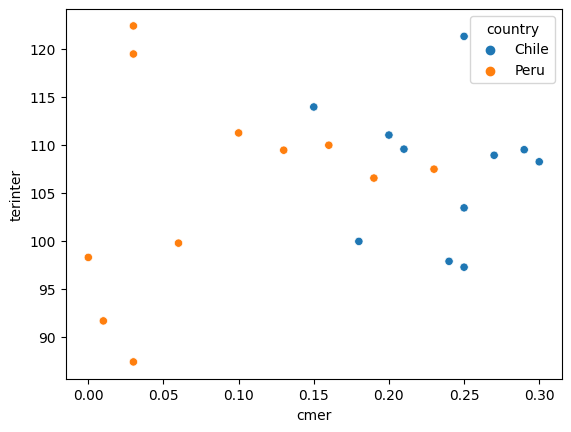

In [14]:
sns.scatterplot(x=data['cmer'],y=data['terinter'],hue=data['country'])